<a href="https://colab.research.google.com/github/CastilloGabriela/Hands-On-Data-Preprocessing-in-Python/blob/main/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: NANCY GABRIELA GONZALEZ CASTILLO
*   MATRÍCULA: A01794546

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [271]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/semana 5/Hands-On-Prep_Missing_Values"
os.chdir(DIR)

# Nueva sección

# Nueva sección

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [273]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

**Númericas: 139**

**Texto: 5**

In [5]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [6]:
response_df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [11]:
response_df.describe(include=[int,float])

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [7]:
response_df.describe(include=[object])

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.

**El histograma permite observar un gráfico mas limpio debido a que realiza un filtro de los resultados de acuerdo con la distribución de los valores**



In [26]:
response_df['Weight'].describe()

count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64

In [279]:
response_df['Weight'].mode()

0    60.0
dtype: float64

In [280]:
response_df['Weight'].median()

65.0

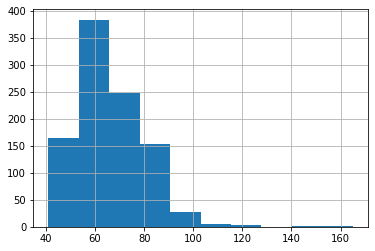

In [46]:
response_df["Weight"].hist()

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra. 

**La asimetría del peso esta inclinada a una cola derecha, lo que indica que los valores más cercanos a la media 66.4 se encuentran del lado derecho.
Es decir, la distribución esta sesgada positivamente.**

In [52]:
response_df['Weight'].skew()

1.2237251927527477

In [53]:
response_df['Weight'].kurt()

3.969322481289579

4. ¿Cuántos valores faltantes tiene la variable `Weight`? **20**

¿Qué porcentaje representa?**1.98**


In [17]:
response_df['Weight'].isnull().mean()*100


1.9801980198019802

In [20]:
response_df['Weight'].isnull().sum()

20

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? 

Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings` **T test= 0.7 y 0.8**
*   Categóricas: `Gender, Education`  **T test = 0.5 y 0.8**

**Segun los resultados es probable que tengan relación ya que existen diferencias bastante significativas.**

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t ver si hay diferencias significativas.
 
**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [231]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

In [232]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()
    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


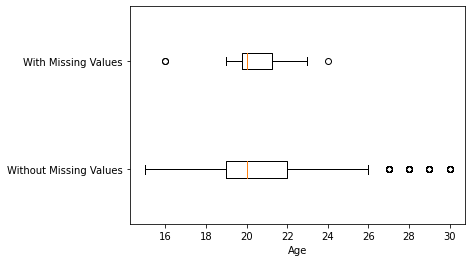

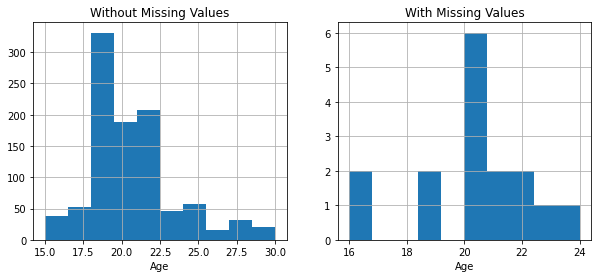

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


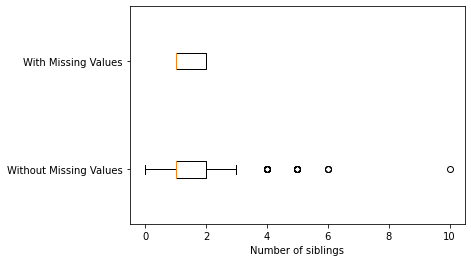

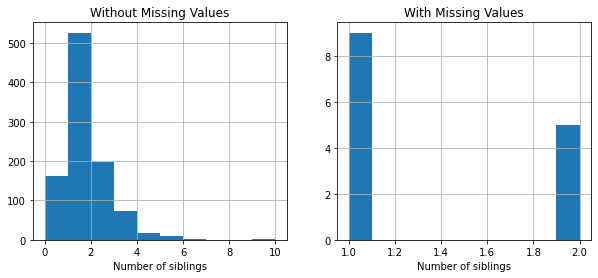

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [237]:
numerical_attributes = ['Age', 'Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

In [238]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Gender:


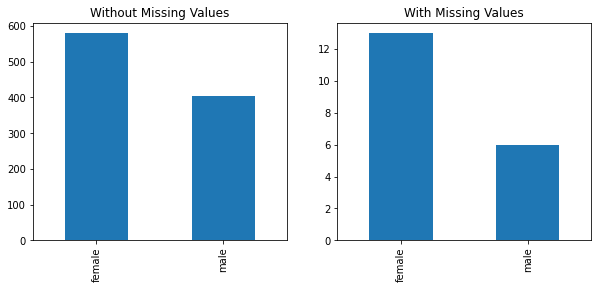

p-value of Chi_squared test: 0.5472167199163878
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Education:


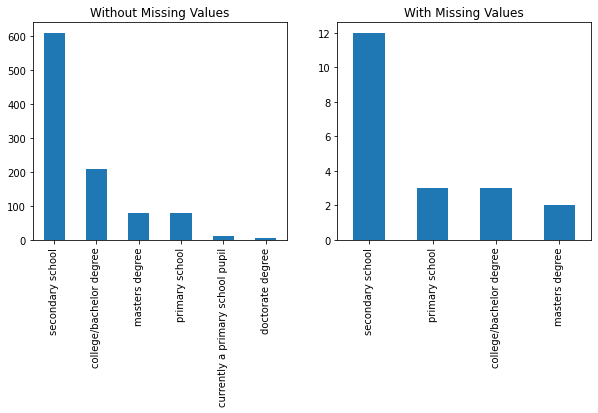

p-value of Chi_squared test: 0.8424822989541867
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [241]:
categorical_attributes = ['Gender', 'Education']

BM_MV = response_df.Weight.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. 
¿Cuál es recomendable y por qué? 

**Se tiene un porcentaje de 1.98% de valores faltantes, por lo tanto es mejor utilizar el metodo de imputación**

In [299]:
response_df['Weight'] = response_df['Weight'].fillna(response_df['Weight'].mean())
response_df['Weight']


0       48.0
1       58.0
2       67.0
3       59.0
4       59.0
        ... 
1005    57.0
1006    80.0
1007    75.0
1008    58.0
1009    72.0
Name: Weight, Length: 1010, dtype: float64

7. ¿Hay valores atípicos de la variable `Weight`? **si**

Confírmalo con un gráfico de boxplot. ¿Cuántos son? **8**

 Almacénalos en un dataframe independiente y elimínalos del conjunto original.

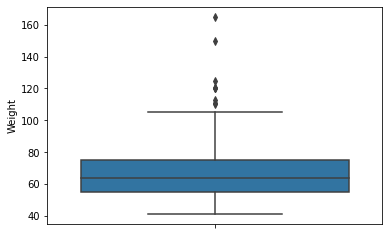

In [243]:
sns.boxplot(y="Weight",data=response_df)
plt.show()

In [137]:
percentile_25 = response_df["Weight"].quantile(0.25)
percentile_75 = response_df["Weight"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = response_df['Weight'][(response_df["Weight"] <= lower_limit) | (response_df["Weight"] >= upper_limit)]
IQR_outliers.unique()

array([120., 110., 111., 113., 125., 165., 150., 105.])

8. Repite el mismo proceso con la variable `Height`.

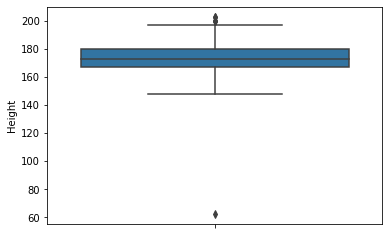

In [242]:
sns.boxplot(y="Height",data=response_df)
plt.show()

In [159]:
percentile_25 = response_df["Height"].quantile(0.25)
percentile_75 = response_df["Height"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliersh = response_df['Height'][(response_df["Height"] <= lower_limit) | (response_df["Height"] >= upper_limit)]
IQR_outliersh.unique()

array([200., 203.,  62.])


9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? **SI**

El `BMI` puede ser calculado usando la siguiente fórmula:
 
`BMI = Weight / Height ^ 2`
 
**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [160]:
a=response_df['Weight']
b=(response_df['Height']/100)**2
BMI=a/b
BMI.nunique()

567

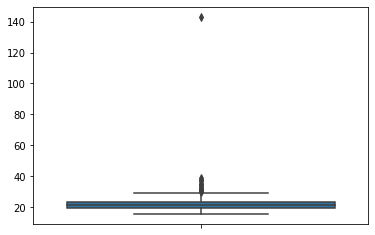

In [227]:
sns.boxplot(y=BMI,data=response_df)
plt.show()

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

In [224]:
response_df.select_dtypes(include='object').nunique()

Smoking                   4
Alcohol                   3
Punctuality               3
Lying                     4
Internet usage            4
Gender                    2
Left - right handed       2
Education                 6
Only child                2
Village - town            2
House - block of flats    2
dtype: int64

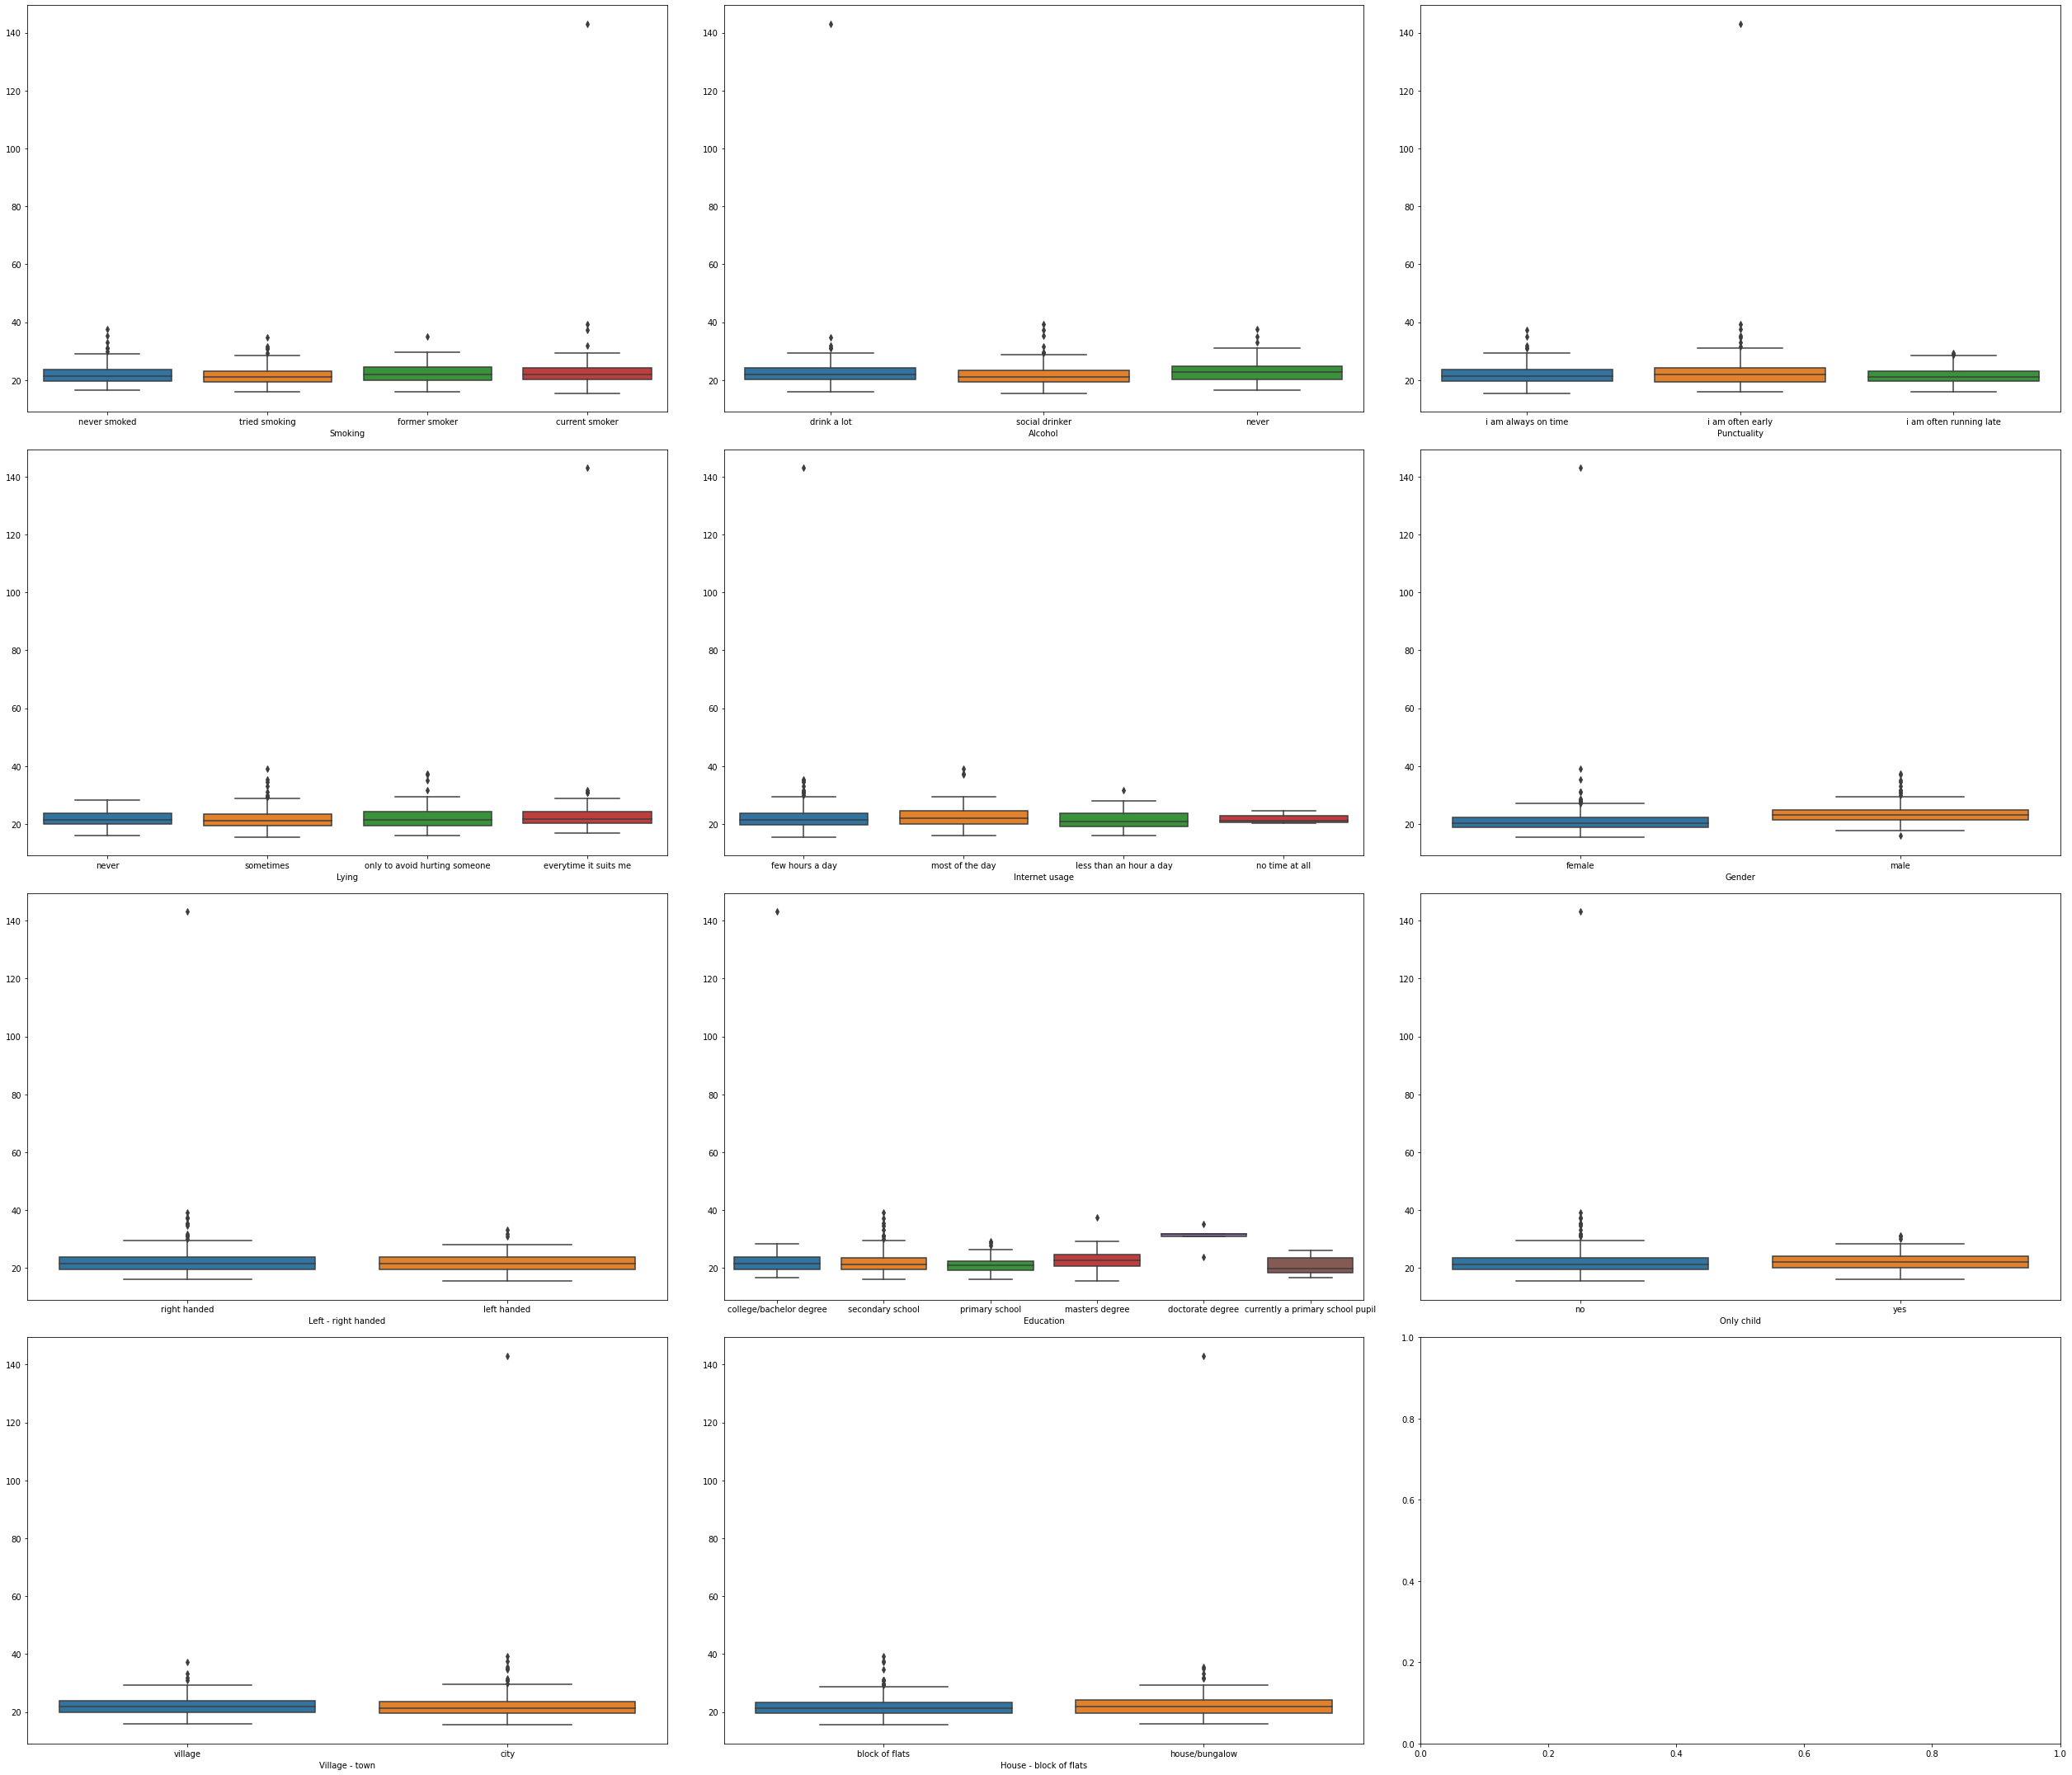

In [230]:
fig,axs=plt.subplots(4,3, figsize=(35,30))
sns.boxplot(x=response_df['Smoking'],y=BMI,data=response_df,ax=axs[0,0])
sns.boxplot(x=response_df['Alcohol'],y=BMI,data=response_df,ax=axs[0,1])
sns.boxplot(x=response_df['Punctuality'],y=BMI,data=response_df,ax=axs[0,2])
sns.boxplot(x=response_df['Lying'],y=BMI,data=response_df,ax=axs[1,0])
sns.boxplot(x=response_df['Internet usage'],y=BMI,data=response_df,ax=axs[1,1])
sns.boxplot(x=response_df['Gender'],y=BMI,data=response_df,ax=axs[1,2])
sns.boxplot(x=response_df['Left - right handed'],y=BMI,data=response_df,ax=axs[2,0])
sns.boxplot(x=response_df['Education'],y=BMI,data=response_df,ax=axs[2,1])
sns.boxplot(x=response_df['Only child'],y=BMI,data=response_df,ax=axs[2,2])
sns.boxplot(x=response_df['Village - town'],y=BMI,data=response_df,ax=axs[3,0])
sns.boxplot(x=response_df['House - block of flats'],y=BMI,data=response_df,ax=axs[3,1])

fig.tight_layout()


